In [1]:
import pandas as pd
import numpy as np

HPP = pd.read_csv('../input/house-price-prediction-challenge/train.csv')
HPP.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [2]:
HPP.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [3]:
HPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [4]:
HPP['ADDRESS'].unique()
print(len(HPP['ADDRESS'].unique()))

6899


In [5]:
HPP['POSTED_BY'].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [6]:
HPP['BHK_OR_RK'].unique()

array(['BHK', 'RK'], dtype=object)

In [7]:
#HPP = HPP[: 900]

In [8]:
X = HPP.iloc[ : , 0 : 11]

In [9]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911


In [10]:
X.drop('ADDRESS', inplace = True, axis = 1)

In [11]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911


In [12]:
y = HPP['TARGET(PRICE_IN_LACS)']

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False, handle_unknown = 'error', drop = 'first')
PB = np.array(X['POSTED_BY'])
PB = PB.reshape(-1, 1)
PB_df = pd.DataFrame(encoder.fit_transform(PB))
PB_df.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [14]:
X = X.join(PB_df)
X.drop('POSTED_BY', inplace = True, axis = 1)
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1
0,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,0.0,1.0
1,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,1.0,0.0
2,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,0.0,1.0
3,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,0.0,1.0
4,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,1.0,0.0


In [15]:
BHRK = pd.get_dummies(X['BHK_OR_RK'], prefix = 'B', drop_first = True)
X = pd.concat([X,BHRK], axis = 1)

In [16]:
BHRK.head()

,B_RK
0,0
1,0
2,0
3,0
4,0


In [17]:
BHRK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   B_RK    29451 non-null  uint8
dtypes: uint8(1)
memory usage: 28.9 KB


In [18]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,B_RK
0,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,0.0,1.0,0
1,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,1.0,0.0,0
2,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,0.0,1.0,0
3,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,0.0,1.0,0
4,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,1.0,0.0,0


In [19]:
X['B_RK'].unique()

array([0, 1], dtype=uint8)

In [20]:
X['B_RK'].value_counts()

0    29427
1       24
Name: B_RK, dtype: int64

In [21]:
X.drop('BHK_OR_RK', inplace = True, axis = 1)

In [22]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,B_RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0.0,1.0,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1.0,0.0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0.0,1.0,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,0.0,1.0,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,1.0,0.0,0


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
scaler = StandardScaler()

k = np.array(X['SQUARE_FT'])
k= k.reshape(-1, 1)
K = scaler.fit_transform(k)

X['SQUARE_FT'] = K

In [25]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,B_RK
0,0,0,2,-0.009731,1,1,12.969910,77.597960,0.0,1.0,0
1,0,0,2,-0.009744,1,1,12.274538,76.644605,1.0,0.0,0
2,0,0,2,-0.009924,1,1,12.778033,77.632191,0.0,1.0,0
3,0,1,2,-0.009926,1,1,28.642300,77.344500,0.0,1.0,0
4,1,0,2,-0.009890,0,1,22.592200,88.484911,1.0,0.0,0


In [26]:
k = np.array(X['LONGITUDE'])
k= k.reshape(-1, 1)
K = scaler.fit_transform(k)

X['LONGITUDE'] = K

In [27]:
k = np.array(X['LATITUDE'])
k= k.reshape(-1, 1)
K = scaler.fit_transform(k)

X['LATITUDE'] = K

In [28]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,0,1,B_RK
0,0,0,2,-0.009731,1,1,-1.342478,0.072011,0.0,1.0,0
1,0,0,2,-0.009744,1,1,-1.454541,-0.018289,1.0,0.0,0
2,0,0,2,-0.009924,1,1,-1.373400,0.075254,0.0,1.0,0
3,0,1,2,-0.009926,1,1,1.183208,0.048004,0.0,1.0,0
4,1,0,2,-0.009890,0,1,0.208204,1.103210,1.0,0.0,0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 1) 

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(32, input_shape = [11], activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(1))

In [31]:
model.compile(
    optimizer = 'adam',
    loss = 'mae',
    )

In [32]:
callbacks = EarlyStopping(
            min_delta = 0.01,
            patience = 10,
            restore_best_weights = True)

In [33]:
history = model.fit(
          X_train, y_train,
          epochs = 50,
          batch_size = 32,
          validation_data = (X_valid, y_valid),
          callbacks = [callbacks])

Epoch 1/50
737/737 [==============================] - 3s 3ms/step - loss: 131.5877 - val_loss: 109.8541
Epoch 2/50
737/737 [==============================] - 2s 2ms/step - loss: 109.6640 - val_loss: 98.2319
Epoch 3/50
737/737 [==============================] - 2s 2ms/step - loss: 92.4219 - val_loss: 96.2771
Epoch 4/50
737/737 [==============================] - 2s 2ms/step - loss: 91.8889 - val_loss: 99.4885
Epoch 5/50
737/737 [==============================] - 1s 2ms/step - loss: 95.9353 - val_loss: 99.1426
Epoch 6/50
737/737 [==============================] - 2s 2ms/step - loss: 99.2736 - val_loss: 98.0996
Epoch 7/50
737/737 [==============================] - 2s 2ms/step - loss: 93.7527 - val_loss: 97.9428
Epoch 8/50
737/737 [==============================] - 2s 2ms/step - loss: 91.4864 - val_loss: 100.9648
Epoch 9/50
737/737 [==============================] - 2s 2ms/step - loss: 88.3855 - val_loss: 99.7050
Epoch 10/50
737/737 [==============================] - 2s 2ms/step - loss: 93.

In [34]:
history_df = pd.DataFrame(history.history)

In [35]:
history_df.head()

,loss,val_loss
0,127.561012,109.854057
1,96.941536,98.231934
2,93.778557,96.277100
3,92.940140,99.488510
4,92.862694,99.142624


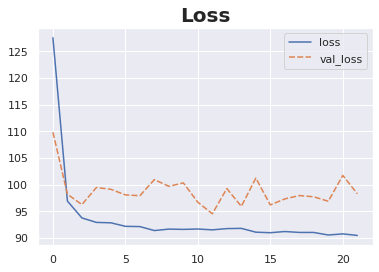

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.title('Loss', fontfamily = 'Arial', fontweight = 'bold', loc = 'center', fontsize = 20)
sns.lineplot(data = history_df)
plt.savefig(r'./Complete.png')